In [1]:
using Pkg
Pkg.activate(".")
#using RemoteFiles
using Dash, PlotlyJS
using CSVFiles
using DataFrames
import TOML
using Dates

function lookup(name)
           # Look up Registry.toml files in depots
           tomlfiles = String[]
           for d in DEPOT_PATH
               regs = joinpath(d, "registries")
               if isdir(regs)
                   for r in readdir(regs)
                       toml = joinpath(regs, r, "Registry.toml")
                       if isfile(toml)
                           push!(tomlfiles, toml)
                       end
                   end
               end
           end
           
           # Look up uuids in toml files
           uuids = Base.UUID[]
           for f in tomlfiles
               toml = TOML.parsefile(f)
               if haskey(toml, "packages")
                   for (k, v) in toml["packages"]
                       if v["name"] == name
                           push!(uuids, Base.UUID(k))
                       end
                   end
               end
           end
           return uuids
       end

data_dir = "./"
df = DataFrame(load(File(format"CSV", data_dir*"package_requests_by_date.csv.gz")));
using Dates

  Activating environment at `~/Dropbox/Upwork/Plotly/JuliaPackages.jl/Project.toml`


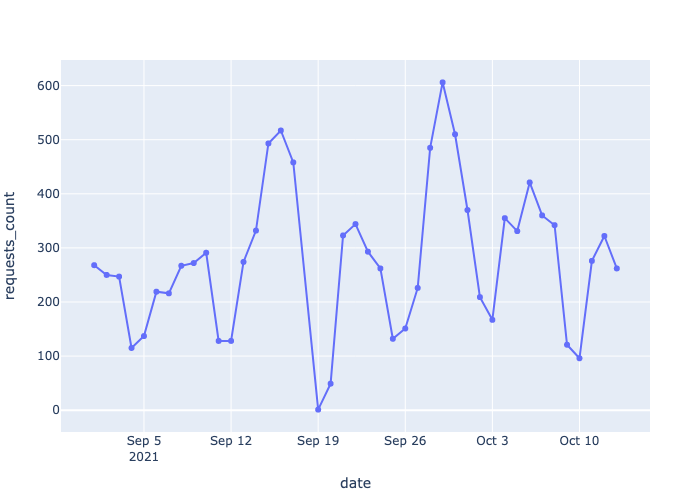

In [2]:
uuid = string(lookup("Revise")[1])
mask = ((df."package_uuid" .== uuid) .& (df."status" .== 200) .& (df."client_type" .== "user"))
uuid_df = df[mask,:]
layout = Layout(;title="",width=800, height=400,
    xaxis=attr(title="date"), yaxis=attr(title="requests_count"))
fig = scatter(uuid_df, x=:date, y=:request_count, mode="markers+lines")
plot(fig, layout)

In [6]:
using Statistics

In [8]:
mean(df."request_count")

196.23947802292165

In [12]:
days = df."date"-df."date"[begin]
mean(days)

InexactError: InexactError: Int64(19.810398323811267)

In [18]:
mean([Dates.value(d) for d in days])

19.810398323811267